In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df=sns.load_dataset('iris')
df

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


* data has 150 rows & 5 columns

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


* Only species column is not numeric

In [4]:
df.isnull().sum()

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64

* No null values in iris data

In [5]:
df.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


* There may be some outliers in sepal width

In [6]:
df.columns

Index(['sepal_length', 'sepal_width', 'petal_length', 'petal_width',
       'species'],
      dtype='object')

In [7]:
col=['sepal_length', 'sepal_width', 'petal_length', 'petal_width']

<AxesSubplot:xlabel='count', ylabel='species'>

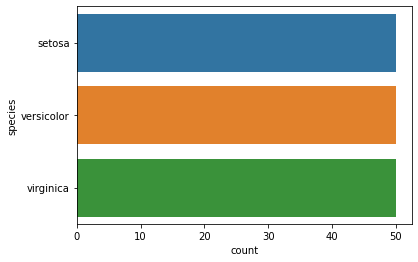

In [8]:
sns.countplot(y=df['species'])

* All species have equal number of observations.

# Distribution of Features

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-lev

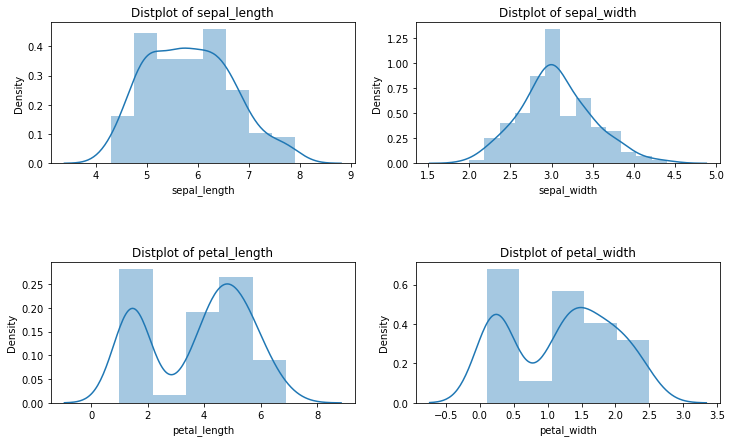

In [9]:
n=0
plt.figure(1,figsize=(12,7))
for i in col:
    n+=1
    plt.subplot(2,2,n)
    plt.subplots_adjust(hspace=0.7)
    sns.distplot(df[i])
    plt.title("Distplot of {}".format(i))
plt.show()

* Distribution of Sepal Length & Sepal Width is Normal while Distribution of Petal_length & Petal width is not Normal

# Detecting Outliers

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\si

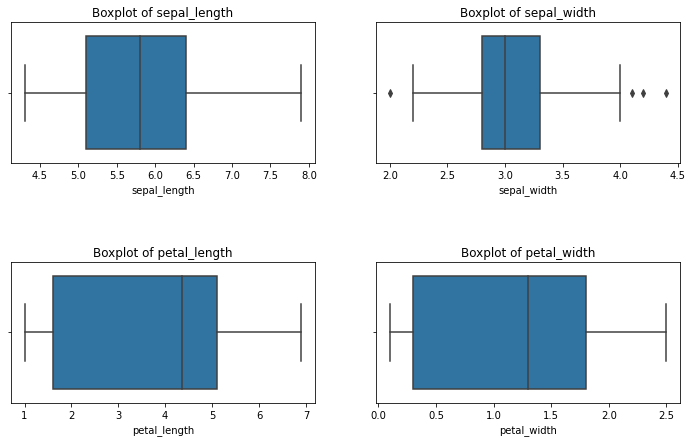

In [10]:
n=0
plt.figure(1,figsize=(12,7))
for i in col:
    n+=1
    plt.subplot(2,2,n)
    plt.subplots_adjust(hspace=0.7)
    sns.boxplot(df[i])
    plt.title("Boxplot of {}".format(i))
plt.show()

* There are some outliers in Sepal Width

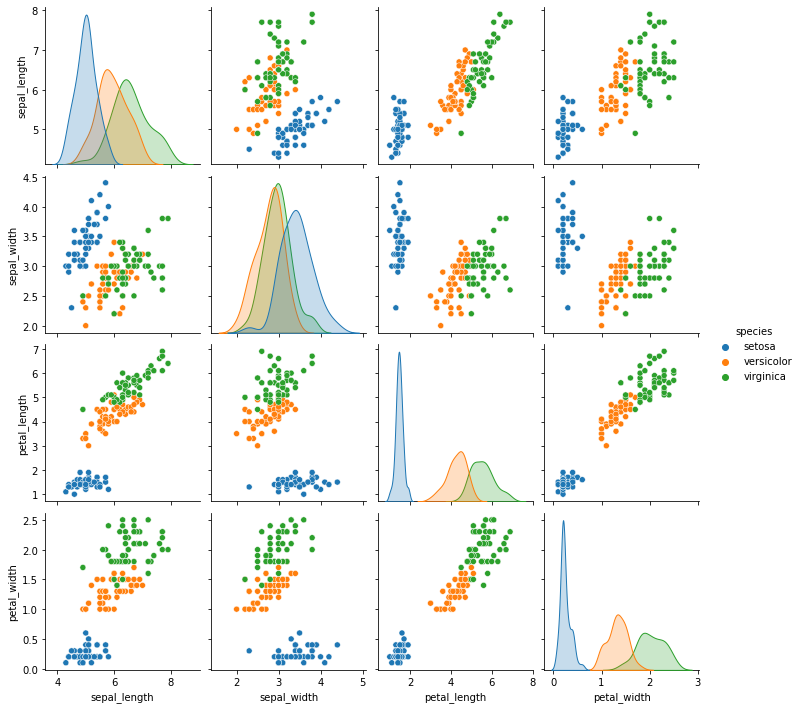

In [11]:
sns.pairplot(df,hue='species')

* From pairplot we can see that we can clearly cluster data on the basis of petal length & petal width, Sepal length & Petal width

In [12]:
x=df.iloc[:, :-1]

In [13]:
x

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [14]:
from sklearn.cluster import KMeans

# Elbow Method

* To definne number of clusters to be formed.

In [15]:
wcss=[]
for i in range(1,11):
    km=KMeans(n_clusters=i)
    y_means=km.fit_predict(x)
    wcss.append(km.inertia_)

C:\Users\admin\AppData\Roaming\Python\Python39\site-packages\sklearn\cluster\_kmeans.py:1334: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\admin\AppData\Roaming\Python\Python39\site-packages\sklearn\cluster\_kmeans.py:1334: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\admin\AppData\Roaming\Python\Python39\site-packages\sklearn\cluster\_kmeans.py:1334: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\admin\AppData\Roaming\Python\Python39\site-packages\sklearn\cluster\_kmea

In [16]:
wcss

[681.3706,
 152.34795176035792,
 78.85144142614601,
 57.25600931571816,
 46.44618205128205,
 39.066035353535355,
 34.40900974025974,
 30.377378506426492,
 28.34737085137085,
 26.020411312371834]

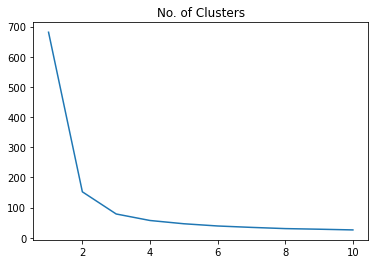

In [17]:
plt.plot(range(1,11),wcss)
plt.title("No. of Clusters")
plt.show()

* from above graph we can say that no. of clusters should be 3

In [18]:
x=df.iloc[:,:-1].values

# Clusters using KMeans

In [19]:
km=KMeans(n_clusters=3)
y_means=km.fit_predict(x)

C:\Users\admin\AppData\Roaming\Python\Python39\site-packages\sklearn\cluster\_kmeans.py:1334: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:ylabel='count'>

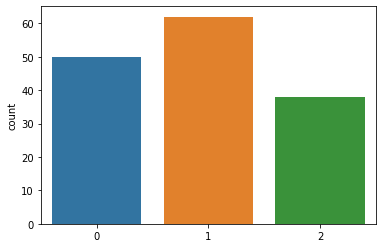

In [20]:
sns.countplot(y_means)

## From above graph we can say that some Species Of verginica & Versicolor are wrongly Classified.

### Clustering using Sepal legth & Sepal width

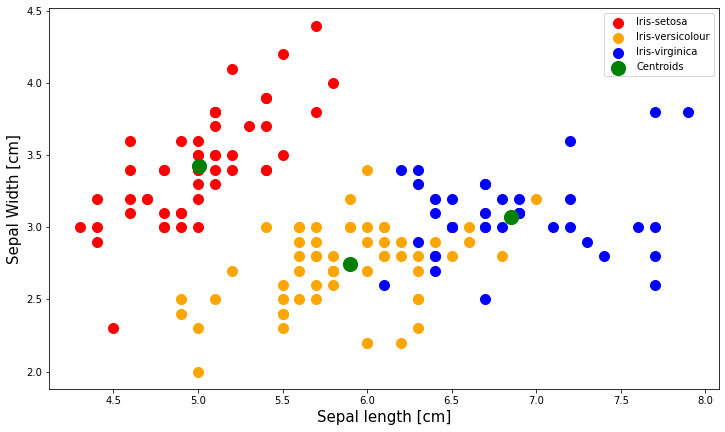

In [21]:
# Plotting Clusters
plt.figure(figsize=(12,7))
plt.scatter(x[y_means == 0, 0], x[y_means == 0, 1], s = 100, c = 'red', label = 'Iris-setosa')
plt.scatter(x[y_means == 1, 0], x[y_means == 1, 1], s = 100, c = 'orange', label = 'Iris-versicolour')
plt.scatter(x[y_means == 2, 0], x[y_means == 2, 1], s = 100, c = 'blue', label = 'Iris-virginica')

plt.xlabel('Sepal length [cm]',fontsize=15)
plt.ylabel('Sepal Width [cm]', fontsize=15)

# plotting Centroids
plt.scatter(km.cluster_centers_[:, 0], km.cluster_centers_[:,1], s=200, c = 'green', label = 'Centroids')

plt.legend()

* On the basis of sepal length & sepal width we can classify versicolor easily while setosa & virginica overlaps.

### Clusters using Sepal length & Petal Length

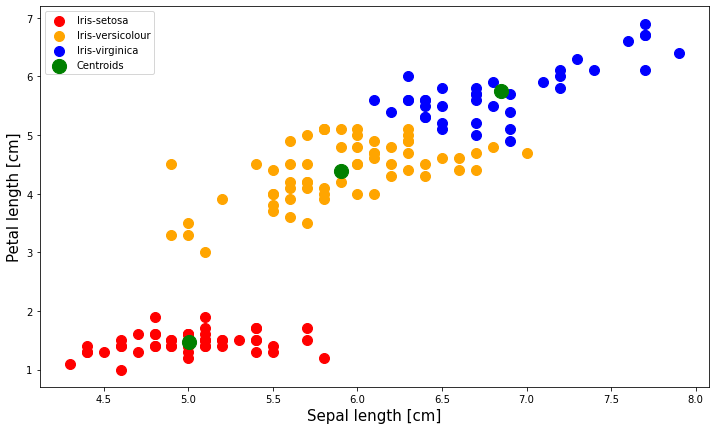

In [22]:
# Plotting Clusters
plt.figure(figsize=(12,7))
plt.scatter(x[y_means == 0, 0], x[y_means == 0, 2], s = 100, c = 'red', label = 'Iris-setosa')
plt.scatter(x[y_means == 1, 0], x[y_means == 1, 2], s = 100, c = 'orange', label = 'Iris-versicolour')
plt.scatter(x[y_means == 2, 0], x[y_means == 2, 2], s = 100, c = 'blue', label = 'Iris-virginica')

plt.xlabel('Sepal length [cm]',fontsize=15)
plt.ylabel('Petal length [cm]', fontsize=15)

# plotting Centroids
plt.scatter(km.cluster_centers_[:, 0], km.cluster_centers_[:,2], s=200, c = 'green', label = 'Centroids')

plt.legend()

* On the basis of sepal length & petal length we can classify All Species Clearly as seen in above diagram.

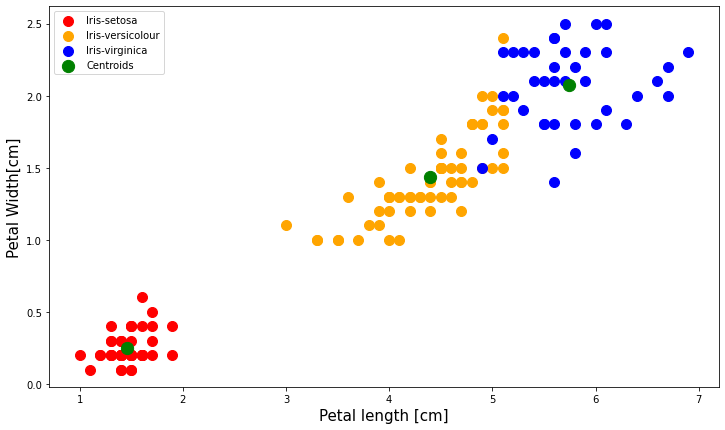

In [23]:
# Plotting Clusters
plt.figure(figsize=(12,7))
plt.scatter(x[y_means == 0, 2], x[y_means == 0, 3], s = 100, c = 'red', label = 'Iris-setosa')
plt.scatter(x[y_means == 1, 2], x[y_means == 1, 3], s = 100, c = 'orange', label = 'Iris-versicolour')
plt.scatter(x[y_means == 2, 2], x[y_means == 2, 3], s = 100, c = 'blue', label = 'Iris-virginica')

plt.xlabel('Petal length [cm]',fontsize=15)
plt.ylabel('Petal Width[cm]', fontsize=15)

# plotting Centroids
plt.scatter(km.cluster_centers_[:, 2], km.cluster_centers_[:,3], s=150, c = 'green', label = 'Centroids')

plt.legend()

* So, from above diagram we can see that Versicolor & Virginca Overlaps.

### To classify or clustur observations it is better to use petal length & sepal length as they assigns observations clearly to each clusture.

# Centroids of Clusters

In [24]:
km.cluster_centers_

array([[5.006     , 3.428     , 1.462     , 0.246     ],
       [5.9016129 , 2.7483871 , 4.39354839, 1.43387097],
       [6.85      , 3.07368421, 5.74210526, 2.07105263]])